<h3 align="center">Pattern Recognition, Semester 9 - October 2021</h3>

## Lab1 Prep: Visual Digit Recognition</h3>

    Dimitris Dimos (031 17 165)
    Konstantinos Kopsinis (031 17 062)

### Aux Code

In [ ]:

# mount drive
from google.colab import drive
drive.mount('/content/drive')

# change to patrec_lab1
%cd /content/drive/MyDrive/PatRec_Labs/Lab1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PatRec_Labs/Lab1


### Imports

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
import lib

### Step 1: Input Data

In [ ]:
with open("train.txt", "r") as train_data:
    train_lines = []
    for line in train_data.readlines():
        train_lines.append(line.replace(" \n", "").replace("\n", "").split(" "))
    train_arr = np.array(train_lines)
    X_train = np.array(train_arr[:,1:], dtype=np.float)
    Y_train = np.array(train_arr[:, 0], dtype=np.float).astype(np.int64)  # cannot cast directly into int64
    n_samples_train = X_train.shape[0]
    n_features = X_train.shape[1]

with open("test.txt", "r") as test_data:
    test_lines = []
    for line in test_data.readlines():
        test_lines.append(line.replace(" \n", "").replace("\n", "").split(" "))
    test_arr = np.array(test_lines)
    X_test = np.array(test_arr[:,1:], dtype=np.float)
    Y_test = np.array(test_arr[:, 0], dtype=np.float).astype(np.int64)    # cannot cast directly into int64
    n_samples_test = X_test.shape[0]

In [ ]:
# check dimensions
print('X_train dimensions: {}'.format(X_train.shape), end='\n')
print('Y_train dimensions: {}'.format(Y_train.shape), end='\n')
assert X_train.shape[0] == Y_train.shape[0]

print('X_test  dimensions: {}'.format(X_test.shape), end='\n')
print('Y_test  dimensions: {}'.format(Y_test.shape), end='\n\n')
assert X_test.shape[0] == Y_test.shape[0]

print('n_samples_train = {}'.format(n_samples_train))
print('n_samples_test = {}'.format(n_samples_test))
print('n_features = {}'.format(n_features))

X_train dimensions: (7291, 256)
Y_train dimensions: (7291,)
X_test  dimensions: (2007, 256)
Y_test  dimensions: (2007,)

n_samples_train = 7291
n_samples_test = 2007
n_features = 256


### Step 2: Plot 131th sample digit

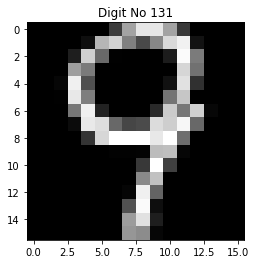

In [ ]:
lib.show_sample(X_train, 131)

### Step 3: Samples Subplots

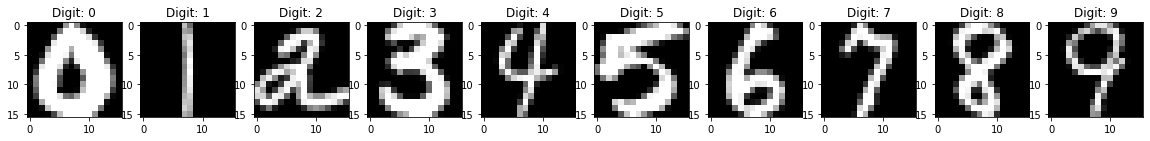

In [ ]:
# first random choice
lib.plot_digits_samples(X_train, Y_train)

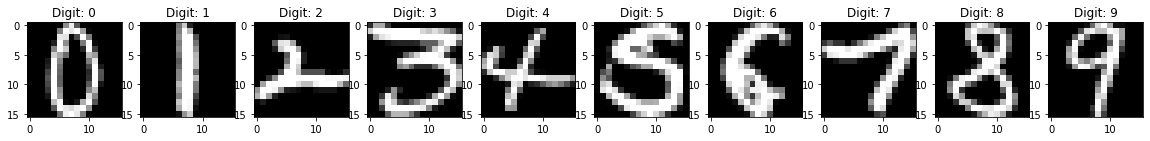

In [ ]:
# and a second random choice
lib.plot_digits_samples(X_train, Y_train)

### Step 4: Mean at Pixel

In [ ]:
mean = lib.digit_mean_at_pixel(X_train, Y_train, 0, 16, (10,10))
print("Mean of (10,10) pixels for digit 0: {}".format(mean))

Mean of (10,10) pixels for digit 0: -0.5041884422110553


### Step 5: Variance at Pixel

In [ ]:
var = lib.digit_variance_at_pixel(X_train, Y_train, 0, 16, (10,10))
print("Variance of (10,10) pixels for digit 0: {}".format(var))

Variance of (10,10) pixels for digit 0: 0.5249618093885184


### Step 6: Digit Mean and Variance

In [ ]:
mean_array_0 = lib.digit_mean(X_train, Y_train, 0, 16, 16)
var_array_0  = lib.digit_variance(X_train, Y_train, 0, 16, 16)

### Step 7 & 8: Mean and Variance Plots

Text(0.5, 1.0, 'Samples of Digit 0: Variance')

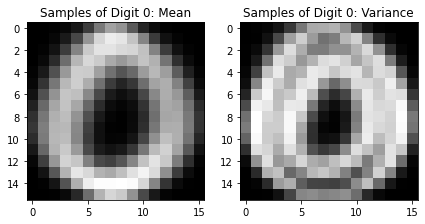

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (7,10))
ax[0].imshow(mean_array_0.reshape((16,16)), cmap = 'gray')
ax[0].set_title('Samples of Digit 0: Mean')
ax[1].imshow(var_array_0.reshape((16,16)), cmap = 'gray')
ax[1].set_title('Samples of Digit 0: Variance')

### Step 9: Mean and Variance for all Digits

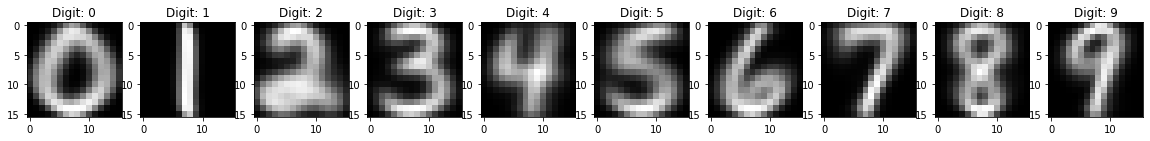

In [ ]:
# (a) calculations
means = [lib.digit_mean(X_train, Y_train, i, 16, 16) for i in range(10)]
means = np.array(means)
vars = [lib.digit_variance(X_train, Y_train, i, 16, 16) for i in range(10)]
vars = np.array(vars)

# (b) plots
labels = np.array([i for i in range(10)])
lib.plot_digits_samples(means, labels)

### Step 10: Classification of the 101th sample

In [ ]:
# we know that the 101th sample is a 6 a priori
sample_digit = X_test[101]

dist = np.inf
classified = -1
for i in range(10):
    new_dist = lib.euclidean_distance(sample_digit, means[i])
    if dist > new_dist:
        dist = new_dist
        classified = i

print('Sample digit No 101 is classified as a {}'.format(classified))

Sample digit No 101 is classified as a 0


### Step 11: Euclidean Distance Classification

In [ ]:
# (a) classify all digits using Euclidean Distance
eucl_classification = lib.euclidean_distance_classifier(X_test, means)

# (b) 
# calculate the real classifications
digit_table = [[],[],[],[],[],[],[],[],[],[]]
for index, digit_class in enumerate(Y_test):
    digit_table[digit_class].append(index)

# calculate how many of them are correct
counter = 0
for index, classification in enumerate(eucl_classification):
    if index in digit_table[classification]:
        counter += 1

success_rate = np.around(float(counter/X_test.shape[0])*100, 2)
print('Success rate for Euclidean Classification is: {}%'.format(success_rate))

Success rate for Euclidean Classification is: 81.42%


### Step 12: Scikit-Learn Estimator

In [ ]:
# first we implement the scikit-ish estimator in lib.py
eucl_classifier = lib.EuclideanDistanceClassifier(16, 16)
eucl_classifier.fit(X_train, Y_train)
print(eucl_classifier.score(X_test, Y_test))

0.8141504733432985


### Step 13: Evaluation and Statistics

In [ ]:
# (a) evaluation: 5-fold cross validation

# in order to not print warnings irrelevant to our work
import warnings
warnings.filterwarnings("ignore")

scores = lib.evaluate_classifier(eucl_classifier, X_train, Y_train, folds=5)
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

CV error = 0.151420 +-0.001816


Reduced dimensionality model accuracy 0.5504046084213414


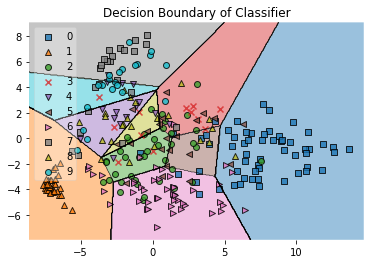

In [ ]:
# (b) decision boundary plot
# apply PCA to reduce dimensionality
# we expect the classification accuracy to
# deviate from its initial value

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# reduce dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# train model with reduced dimensions
model = lib.EuclideanDistanceClassifier(2,1)

# score
model.fit(X_reduced, Y_train)
model_score = model.score(X_reduced, Y_train)
print("Reduced dimensionality model accuracy {}".format(model_score))

# plot decision boundaries
fig = plt.figure()
fig = plot_decision_regions(X=X_reduced[200:500], y=Y_train[200:500], clf=model, legend=2)
plt.title("Decision Boundary of Classifier")
plt.show()

In [ ]:
# (c) plot learning curve
# Notice: with 'np.linspace(.1, 1.0, 10)' takes 3m 16s
# For quicker results, run with 'np.linspace(.1, 1.0, 5)'

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    eucl_classifier, X_train, Y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10, endpoint=True))


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

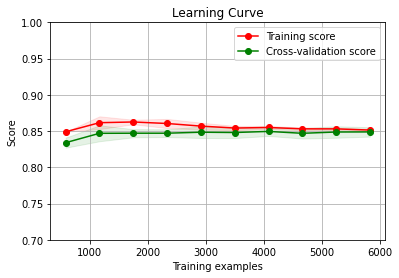

In [ ]:
def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Problem: train_scores[0][0] = test_scores[0][0] = nan
    # Solution:  use only the other 4 measurements to calculate mean/std of [0]
    # Yet: don't know why?
    train_scores_mean[0] = np.mean(train_scores[0, 1:])
    train_scores_std[0] = np.std(train_scores[0, 1:])
    test_scores_mean[0] = np.mean(test_scores[0, 1:])
    test_scores_std[0] = np.std(test_scores[0, 1:])

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.7, 1))

## Main Lab

###Step 14: A-priori Probabilities

In [ ]:
priors = lib.calculate_priors(X_train, Y_train)
print(priors)
print(sum(priors))

[0.16376354 0.13784117 0.1002606  0.09024825 0.08942532 0.0762584
 0.09107118 0.08846523 0.07433823 0.08832808]
1.0


###Step 15: Naive Bayesian Classifier explicit implementation

Bayes classifier classifies data into the most probable class, meaning \\
the class that maximizes the following probability:

$$
    \mathcal{P}(y|\vec{x}) = \frac{\mathcal{P}(y)\cdot \mathcal{P}(\vec{x}|y)}{P{(\vec{x})}} = \frac{\mathcal{P}(y)\cdot \mathcal{P}(x_1,x_2,\dots,x_n|y)}{P{(x_1,x_2,\dots,x_n)}}
$$

Assuming independency among the particular variables $x_1,x_2,\dots,x_n$, therefore rendering our classifier $\textit{naive}$, the above probability equals:

$$
    \mathcal{P}(y|x_1,\dots,x_n) = \frac{\mathcal{P}(y)\cdot \mathcal{P}(x_1|y)\cdot\mathcal{P}(x_2|y) \cdots \mathcal{P}(x_n|y)}{P{(x_1,x_2,\dots,x_n)}}
$$

So, in order to classify a datum $\vec{x} = (x_1,x_1,\dots,x_n)$ we need to calculate the above probabilities for every class $y$ and choose the maximum one. Clearly, the denominator $\mathcal{P}(x_1,x_2,\dots,x_n)$ does not make any difference in this procedure, so its calculation can be omitted.

To sum up, our model consists of:

$\bullet$ prior probabilites $\mathcal{P}(y)$, calculated directly by counting

$\bullet$ conditional probabilities $\mathcal{P}(x_i|y)$

Given that the pixels are numerical variables we assume that $\textit{each conditional probability}$ follows a Gaussian distribution.

We remind that: $$\mathcal{N}(\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}exp\Big[-\frac{1}{2}\Big(\frac{x-\mu}{\sigma}\Big)^2\Big]$$


In [ ]:
# (a) Custom Naive Bayes classification

NB_classifier = lib.CustomNBClassifier(use_unit_variance = False)
NB_classifier.fit(X_train, Y_train)
NB_pred = NB_classifier.predict(X_test)
print(NB_pred[97:111])
print(Y_train[97:111])

[0 0 9 0 2 7 8 0 7 2 9 9 9 3]
[0 4 6 8 0 0 3 0 8 0 9 0 3 8]


In [ ]:
# (b) classification score

NB_score = NB_classifier.score(X_test, Y_test)
print("Custom Gaussian Naive Bayes classifier accuracy: {}%".format(np.round(NB_score*100, 2)))

Custom Gaussian Naive Bayes classifier accuracy: 71.9%


In [ ]:
# (c) Comparison with Scikit-learn's classifier
from sklearn.naive_bayes import GaussianNB

SK_GaussianNB = GaussianNB()
SK_GaussianNB.fit(X_train, Y_train)
#SK_GaussianNB_pred = SK_GaussianNB.predict(X_train)

SK_GaussianNB_score = SK_GaussianNB.score(X_test, Y_test)
print("Scikit's Gaussian Naive Bayes classifier accuracy: {}%".format(np.round(SK_GaussianNB_score*100, 2)))      

Scikit's Gaussian Naive Bayes classifier accuracy: 71.95%


### Step 16: Unit Variance

In [ ]:
NB_classifier = lib.CustomNBClassifier(use_unit_variance = True)
NB_classifier.fit(X_train, Y_train)

NB_score = NB_classifier.score(X_test, Y_test)
print("Custom Gaussian Naive Bayes (unit variance) classifier accuracy: {}%".format(np.round(NB_score*100, 2)))

Custom Gaussian Naive Bayes (unit variance) classifier accuracy: 81.27%


### Step 17: Comparing Naive Bayes, Nearest Neighbors, SVM

In [ ]:
# implementations in lib.py


# Euclidean Classifier (NB subcase, var=1)
euclidean_score = np.round(lib.evaluate_euclidean_classifier(X_train, Y_train, folds=5)*100,2)

# Naive Bayes Implementations
custom_NaiveBayes_score = np.round(lib.evaluate_custom_nb_classifier(X_train, Y_train, folds=5,use_unit_variance=False)*100,2)
custom_NaiveBayes_score_unit = np.round(lib.evaluate_custom_nb_classifier(X_train, Y_train, folds=5,use_unit_variance=True)*100,2)
sklearn_NB_score = np.round(lib.evaluate_sklearn_nb_classifier(X_train, Y_train, folds=5)*100,2)

# SVM Classifier
svm_linear_score = np.round(lib.evaluate_linear_svm_classifier(X_train, Y_train, folds=5)*100,2)
svm_rbf_score = np.round(lib.evaluate_rbf_svm_classifier(X_train, Y_train, folds=5)*100,2)

# K Nearest Neighbours Classifier
KNN_3_score = np.round(lib.evaluate_knn_classifier(X_train, Y_train, folds=5, neighbors = 3)*100,2)
KNN_5_score = np.round(lib.evaluate_knn_classifier(X_train, Y_train, folds=5, neighbors = 5)*100,2)


print (f"{'Euclidean Distance Classifier Score:':<50}{euclidean_score:<40}")
print (f"{'Custom NB Classifier Score (No Unit Variance):':<50}{custom_NaiveBayes_score:<40}")
print (f"{'Custom NB Classifier Score (Unit Variance):':<50}{custom_NaiveBayes_score_unit:<40}")
print (f"{'sklearn Gaussian NB Classifier Score:':<50}{sklearn_NB_score:<40}")
print (f"{'SVM Classifier Score (Linear Kernel):':<50}{svm_linear_score:<40}")
print (f"{'SVM Classifier Score (rbf kernel):':<50}{svm_rbf_score:<40}")
print (f"{'KNN Classifier (3 neighbors) Score:':<50}{KNN_3_score:<40}")
print (f"{'KNN Classifier (5 neighbors) Score:':<50}{KNN_5_score:<40}")

Euclidean Distance Classifier Score:              84.86                                   
Custom NB Classifier Score (No Unit Variance):    74.89                                   
Custom NB Classifier Score (Unit Variance):       84.83                                   
sklearn Gaussian NB Classifier Score:             74.83                                   
SVM Classifier Score (Linear Kernel):             95.25                                   
SVM Classifier Score (rbf kernel):                97.63                                   
KNN Classifier (3 neighbors) Score:               96.39                                   
KNN Classifier (5 neighbors) Score:               95.99                                   


### Step 18: Ensembling Classifiers

In [ ]:
# Function that finds mostly mispredicted digits for certain model
def mispredictions(model, X_train, Y_train):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)

    mispredict_per_digit = np.zeros(10) #array of mispredictions per digit
    test_samples = len(Y_train)
    for i in range(test_samples):
        if not Y_train[i] == predictions[i]: # misprediction occured
            mispredict_per_digit[int(Y_train[i])] = mispredict_per_digit[int(Y_train[i])] + 1
    
  
    top_mispredictions = np.argsort(mispredict_per_digit)[::-1] # sort digits that are mostly mispredicted

    return mispredict_per_digit, top_mispredictions

Then, for each model we find its mostly mispredicted digits.

In [ ]:
# Euclidean Distance Classifier
model = lib.EuclideanDistanceClassifier(x_dim=256, y_dim=1)
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('Euclidean Distance Classifier:')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

Euclidean Distance Classifier:
 Mispredictions per Digit:                        [195.   4. 145.  80. 132. 116.  95. 105.  88. 124.]
 Top Digits Mispredicted:                         [0 2 4 9 5 7 6 8 3 1]                   


In [ ]:
# Custom Gaussian NB Classifier (No Unit Variance)
model = lib.CustomNBClassifier(use_unit_variance=False)
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('Custom NB Classifier (No Unit Variance):')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

Custom NB Classifier (No Unit Variance):
 Mispredictions per Digit:                        [180.   7. 148. 275. 465. 322.  49.  49. 182.  78.]
 Top Digits Mispredicted:                         [4 5 3 8 0 2 9 7 6 1]                   


In [ ]:
# Custom Gaussian NB Classifier (Unit Variance)
model = lib.CustomNBClassifier(use_unit_variance=True)
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('Custom NB Classifier (Unit Variance):')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

Custom NB Classifier (Unit Variance):
 Mispredictions per Digit:                        [190.   4. 144.  80. 133. 119.  93. 105.  90. 125.]
 Top Digits Mispredicted:                         [0 2 4 9 5 7 6 8 3 1]                   


In [ ]:
# scikit-learn Gaussian NB Classifier
model = GaussianNB()
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('scikit-learn NB Classifier:')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

scikit-learn NB Classifier:
 Mispredictions per Digit:                        [183.   8. 148. 274. 465. 323.  49.  48. 184.  77.]
 Top Digits Mispredicted:                         [4 5 3 8 0 2 9 6 7 1]                   


In [ ]:
# SVM (linear kernel)
model = SVC(kernel='linear')
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('SVM (linear kernel) Classifier:')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

SVM (linear kernel) Classifier:
 Mispredictions per Digit:                        [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]         
 Top Digits Mispredicted:                         [4 9 8 7 6 5 3 2 1 0]                   


In [ ]:
# SVM (rbf kernel)
model = SVC(kernel='rbf')
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('SVM (rbf kernel) Classifier:')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

SVM (rbf kernel) Classifier:
 Mispredictions per Digit:                        [0. 0. 7. 4. 4. 6. 7. 6. 8. 4.]         
 Top Digits Mispredicted:                         [8 6 2 7 5 9 4 3 1 0]                   


In [ ]:
# KNN (3 Neighbors)
model = KNeighborsClassifier(n_neighbors=3)
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('KNN (3 Neighbors) Classifier:')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

KNN (3 Neighbors) Classifier:
 Mispredictions per Digit:                        [ 3.  0. 15.  9. 16. 13.  8.  3. 20. 10.]
 Top Digits Mispredicted:                         [8 4 2 5 9 3 6 7 0 1]                   


In [ ]:
# KNN (5 Neighbors)
model = KNeighborsClassifier(n_neighbors=5)
mispredict_per_digit, top_mispredictions = mispredictions(model, X_train, Y_train)
print('KNN (5 Neighbors) Classifier:')
print (f"{' Mispredictions per Digit:':<50}{str(mispredict_per_digit):<40}")
print (f"{' Top Digits Mispredicted:':<50}{str(top_mispredictions):<40}")

KNN (5 Neighbors) Classifier:
 Mispredictions per Digit:                        [ 6.  1. 20. 11. 28. 23.  9. 11. 31. 12.]
 Top Digits Mispredicted:                         [8 4 5 2 9 7 3 6 0 1]                   


####18a. Voting Classifier

Given the above observations, we combine classifiers **SVM (linear kernel)**, which mispredicts digit 4 only once, **KNN (3 Neighbors)**, which mostly mispredicts digit 8, using the *Soft Voting* Technique.

As far as the *Hard Voting* Technique is concerned, an odd number of Classifiers should be used, so we also use the **SVM (rbf kernel)** classifier, which also tends to misclassify mostly digit 8 but with a much lesser frequency.

In [ ]:
models = [('svm_lin',SVC(kernel='linear',probability=True)),
               ('knn_3',KNeighborsClassifier(n_neighbors=3)),
              ('svm_rbf',SVC(kernel='rbf',probability=True))]    

In [ ]:
# 1st Experiment: SVM (linear kernel) + KNN (3 Neighbors)
score = np.round(lib.evaluate_voting_classifier(models[0:2], X_train, Y_train, 5,'soft')*100,2)
print(f"{'1st Combination Voting Classifier (Soft Voting) Score:':<50}{score:<40}") 

1st Combination Voting Classifier (Soft Voting) Score:97.22                                   


In [ ]:
# 2nd Experiment: SVM (linear kernel) + KNN (3 Neighbors) + SVM (rbf kernel)
hard_score = np.round(lib.evaluate_voting_classifier(models, X_train, Y_train, 5,'hard')*100, 2)
print(f"{'2nd Combination Voting Classifier (Hard Voting) Score:':<50}{hard_score:<40}") 

soft_score = np.round(lib.evaluate_voting_classifier(models, X_train, Y_train, 5,'soft')*100, 2)
print(f"{'2nd Combination Voting Classifier (Soft Voting) Score:':<50}{soft_score:<40}") 

2nd Combination Voting Classifier (Hard Voting) Score:97.52                                   
2nd Combination Voting Classifier (Soft Voting) Score:97.63                                   


####18b. Bagging Classifier

For ensembling with Bagging, we use the classifier with the best score: **SVM (rbf kernel)**. We experiment with 5, 10, 15 estimators.

In [ ]:
base_model = SVC(kernel='rbf', probability=True)
score = np.round(lib.evaluate_bagging_classifier(base_model, X_train, Y_train, estimators=5, folds=5)*100,2)
print(f"{'Bagging Classifier (5 estimators) Score:':<50}{score:<40}") 

Bagging Classifier (5 estimators) Score:          97.59                                   


In [ ]:
score = np.round(lib.evaluate_bagging_classifier(base_model, X_train, Y_train, estimators=10, folds=5)*100,2)
print(f"{'Bagging Classifier (10 estimators) Score:':<50}{score:<40}") 

Bagging Classifier (10 estimators) Score:         97.65                                   


In [ ]:
score = np.round(lib.evaluate_bagging_classifier(base_model, X_train, Y_train, estimators=15, folds=5)*100,2)
print(f"{'Bagging Classifier (15 estimators) Score:':<50}{score:<40}") 

Bagging Classifier (15 estimators) Score:         97.63                                   


###Step 19: Neural networks implementation

In [ ]:
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#### 19a. Dataset and Dataloader class implementation for digit data

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class DigitData(Dataset):
    def __init__(self, X, y, trans=None):
        # all the available data are stored in a list
        self.data = list(zip(X, y))
        # we optionally may add a transformation on top of the given data
        # this is called augmentation in realistic setups
        self.trans = trans
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        if self.trans is not None:
            return self.trans(self.data[idx])
        else:
            return self.data[idx]

class ToTensor(object):
  """converts a numpy object to a torch tensor"""
  def __init__(self):
        pass
      
  def __call__(self, datum):
      x, y = datum[0], datum[1]
      t = torch.from_numpy(x).type(torch.FloatTensor) 
      return t, y

In [ ]:
EPOCHS = 100
BATCH_SZ = 32
train_data = DigitData(X_train, Y_train, trans=ToTensor())
test_data = DigitData(X_test, Y_test, trans=ToTensor())
train_dl = DataLoader(train_data, batch_size=BATCH_SZ, shuffle=True)
test_dl = DataLoader(test_data, batch_size=BATCH_SZ, shuffle=True)

#### 19b.


##### A. Fully connected neural network implementation for digit data

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LinearWActivation(nn.Module): 
  def __init__(self, in_features, out_features, activation='Sigmoid'):
      super(LinearWActivation, self).__init__()
      self.f = nn.Linear(in_features, out_features)
      if activation == 'Sigmoid':
          self.a = nn.Sigmoid()
      else:
          self.a = nn.ReLU()
      
  def forward(self, x): 
      return self.a(self.f(x))

class MyFunnyNet(nn.Module): 
    def __init__(self, layers, n_features, n_classes, activation='Sigmoid'):
      '''
      Args:
        layers (list): a list of the number of consecutive layers
        n_features (int):  the number of input features
        n_classes (int): the number of output classes
        activation (str): type of non-linearity to be used
      '''
      super(MyFunnyNet, self).__init__()
      layers_in = [n_features] + layers # list concatenation
      layers_out = layers + [n_classes]
      # loop through layers_in and layers_out lists
      self.f = nn.Sequential(*[
          LinearWActivation(in_feats, out_feats, activation=activation)
          for in_feats, out_feats in zip(layers_in, layers_out)
      ])
      # final classification layer is always a linear mapping
      self.clf = nn.Linear(n_classes, n_classes)
      self.label = "{:<21} \t{:<7}".format(str(layers), activation)
                
    def forward(self, x): # again the forwrad pass
      # apply non-linear composition of layers/functions
      y = self.f(x)
      # return an affine transformation of y <-> classification layer
      return self.clf(y)

In [ ]:
net = MyFunnyNet([100, 100], X_train.shape[1], len(set(Y_train)))
print(f"The network architecture is: \n {net}")

The network architecture is: 
 MyFunnyNet(
  (f): Sequential(
    (0): LinearWActivation(
      (f): Linear(in_features=256, out_features=100, bias=True)
      (a): Sigmoid()
    )
    (1): LinearWActivation(
      (f): Linear(in_features=100, out_features=100, bias=True)
      (a): Sigmoid()
    )
    (2): LinearWActivation(
      (f): Linear(in_features=100, out_features=10, bias=True)
      (a): Sigmoid()
    )
  )
  (clf): Linear(in_features=10, out_features=10, bias=True)
)


##### B. Network training and testing

In [ ]:
import torch.optim as optim

def train(net, train_dl, criterion=nn.CrossEntropyLoss(), learning_rate=1e-2, optim_func=optim.SGD, allow_printing=False):
    optimizer = optim_func(net.parameters(), lr=learning_rate) # feed the optimizer with the network parameters
    net.train() # gradients "on"
    for epoch in range(EPOCHS): # loop through dataset
        running_average_loss = 0
        for i, data in enumerate(train_dl): # loop thorugh batches
            X_batch, y_batch = data # get the features and labels
            optimizer.zero_grad() # ALWAYS USE THIS!! 
            out = net(X_batch) # forward pass
            loss = criterion(out, y_batch) # compute per batch loss 
            loss.backward() # compute gradients based on the loss function
            optimizer.step() # update weights 
            
            running_average_loss += loss.detach().item()
            if allow_printing and i % 100 == 0:
                print("Epoch: {} \t Batch: {} \t Loss {}".format(epoch, i, float(running_average_loss) / (i + 1)))

def evaluate(net, test_dl):
    net.eval() # turns off batchnorm/dropout ...
    acc = 0
    n_samples = 0
    with torch.no_grad(): # no gradients required!! eval mode, speeds up computation
        for i, data in enumerate(test_dl):
            X_batch, y_batch = data # test data and labels
            out = net(X_batch) # get net's predictions
            val, y_pred = out.max(1) # argmax since output is a prob distribution
            acc += (y_batch == y_pred).sum().detach().item() # get accuracy
            n_samples += X_batch.size(0)
    print("{} \t-> Accuracy: {:.2f}%".format(net.label, acc * 100/ n_samples))

In [ ]:
train(net, train_dl, allow_printing=True)

Epoch: 0 	 Batch: 0 	 Loss 2.43612003326416
Epoch: 0 	 Batch: 100 	 Loss 2.3363524380296763
Epoch: 0 	 Batch: 200 	 Loss 2.3176826837644056
Epoch: 1 	 Batch: 0 	 Loss 2.298663377761841
Epoch: 1 	 Batch: 100 	 Loss 2.2752267299312177
Epoch: 1 	 Batch: 200 	 Loss 2.276095009561795
Epoch: 2 	 Batch: 0 	 Loss 2.241879940032959
Epoch: 2 	 Batch: 100 	 Loss 2.272773508978362
Epoch: 2 	 Batch: 200 	 Loss 2.270988714635669
Epoch: 3 	 Batch: 0 	 Loss 2.2513370513916016
Epoch: 3 	 Batch: 100 	 Loss 2.2635488510131836
Epoch: 3 	 Batch: 200 	 Loss 2.2701347194500823
Epoch: 4 	 Batch: 0 	 Loss 2.215959310531616
Epoch: 4 	 Batch: 100 	 Loss 2.2668485665085294
Epoch: 4 	 Batch: 200 	 Loss 2.267825892908656
Epoch: 5 	 Batch: 0 	 Loss 2.294757127761841
Epoch: 5 	 Batch: 100 	 Loss 2.2684322560187615
Epoch: 5 	 Batch: 200 	 Loss 2.2696304463628514
Epoch: 6 	 Batch: 0 	 Loss 2.2476534843444824
Epoch: 6 	 Batch: 100 	 Loss 2.268960442873511
Epoch: 6 	 Batch: 200 	 Loss 2.268345121127456
Epoch: 7 	 Batch: 

In [ ]:
evaluate(net, test_dl)

[100, 100]            	Sigmoid 	-> Accuracy: 50.92%


##### C. Experimentation with neurons number - layers number - non-linear activation types

In [ ]:
EPOCHS = 50
BATCH_SZ = 32
train_data = DigitData(X_train, Y_train, trans=ToTensor())
test_data = DigitData(X_test, Y_test, trans=ToTensor())
train_dl = DataLoader(train_data, batch_size=BATCH_SZ, shuffle=True)
test_dl = DataLoader(test_data, batch_size=BATCH_SZ, shuffle=True)

def experiment(layers, activation='Sigmoid'):
    net = MyFunnyNet(layers, X_train.shape[1], len(set(Y_train)), activation)
    train(net, train_dl)
    evaluate(net, test_dl)

experiment([25, 25])
experiment([50, 50])
experiment([100, 100])
experiment([200, 200])
experiment([100])
experiment([100, 100])
experiment([100, 100, 100])
experiment([100, 100, 100, 100])

experiment([25, 25], activation="ReLu")
experiment([50, 50], activation="ReLu")
experiment([100, 100], activation="ReLu")
experiment([200, 200], activation="ReLu")
experiment([100], activation="ReLu")
experiment([100, 100], activation="ReLu")
experiment([100, 100, 100], activation="ReLu")
experiment([100, 100, 100, 100], activation="ReLu")

[25, 25]              	Sigmoid 	-> Accuracy: 17.89%
[50, 50]              	Sigmoid 	-> Accuracy: 30.64%
[100, 100]            	Sigmoid 	-> Accuracy: 32.29%
[200, 200]            	Sigmoid 	-> Accuracy: 33.93%
[100]                 	Sigmoid 	-> Accuracy: 78.82%
[100, 100]            	Sigmoid 	-> Accuracy: 30.59%
[100, 100, 100]       	Sigmoid 	-> Accuracy: 17.89%
[100, 100, 100, 100]  	Sigmoid 	-> Accuracy: 17.89%
[25, 25]              	ReLu    	-> Accuracy: 92.33%
[50, 50]              	ReLu    	-> Accuracy: 92.97%
[100, 100]            	ReLu    	-> Accuracy: 92.87%
[200, 200]            	ReLu    	-> Accuracy: 93.02%
[100]                 	ReLu    	-> Accuracy: 92.13%
[100, 100]            	ReLu    	-> Accuracy: 92.63%
[100, 100, 100]       	ReLu    	-> Accuracy: 93.02%
[100, 100, 100, 100]  	ReLu    	-> Accuracy: 91.58%


#### 19c. Neural network implementation compatible with scikit-learn

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics as stats

class CustomNNClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, NN_architecture, EPOCHS=30, BATCH_SZ=32, activation='Sigmoid', criterion=nn.CrossEntropyLoss(), learning_rate=1e-2, optim_func=optim.SGD, allow_printing=False):
        self.net = None
        self.NN_architecture = NN_architecture
        self.EPOCHS = EPOCHS
        self.BATCH_SZ = BATCH_SZ
        self.activation = activation
        self.criterion = criterion
        self.learning_rate = learning_rate
        self.optim_func = optim_func
        self.allow_printing = allow_printing        

    def fit(self, X, y):
        """
        This should fit classifier. All the "work" should be done here.
        fit always returns self.
        """
        train_data = DigitData(X, y, trans=ToTensor())
        train_dl = DataLoader(train_data, batch_size=self.BATCH_SZ, shuffle=True)
        self.net = MyFunnyNet(self.NN_architecture, X.shape[1], len(set(y)), self.activation)
        
        optimizer = self.optim_func(self.net.parameters(), lr=self.learning_rate) # feed the optimizer with the network parameters
        self.net.train() # gradients "on"
        for epoch in range(self.EPOCHS): # loop through dataset
            running_average_loss = 0
            for i, data in enumerate(train_dl): # loop thorugh batches
                X_batch, y_batch = data # get the features and labels
                optimizer.zero_grad() # ALWAYS USE THIS!! 
                out = self.net(X_batch) # forward pass
                loss = self.criterion(out, y_batch) # compute per batch loss 
                loss.backward() # compurte gradients based on the loss function
                optimizer.step() # update weights 
                
                running_average_loss += loss.detach().item()
                if self.allow_printing and i % 100 == 0:
                    print("Epoch: {} \t Batch: {} \t Loss {}".format(epoch, i, float(running_average_loss) / (i + 1)))
        return self

    def predict(self, X):
        """
        Make predictions for X based on the
        maximum probabilty of neuron network's last layer
        """
        out = self.net(X) # get net's predictions
        val, y_pred = out.max(1) # argmax since output is a prob distribution
        return y_pred

    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        test_data = DigitData(X, y, trans=ToTensor())                              
        test_dl = DataLoader(test_data, batch_size=self.BATCH_SZ, shuffle=True)  
        
        self.net.eval() # turns off batchnorm/dropout ...
        acc = 0
        n_samples = 0
        with torch.no_grad(): # no gradients required!! eval mode, speeds up computation
            for i, data in enumerate(test_dl):
                X_batch, y_batch = data # test data and labels
                y_pred = self.predict(X_batch)
                acc += (y_batch == y_pred).sum().detach().item() # get accuracy
                n_samples += X_batch.size(0)
        return acc * 100 / n_samples

#### 19d. Evaluation and experimentation

In [ ]:
NN_classifier = CustomNNClassifier(NN_architecture=[50, 50], EPOCHS=50)
NN_classifier.fit(X_train, Y_train)
NN_classifier_score = NN_classifier.score(X_test, Y_test)  
print("{} \t-> Accuracy: {:.2f}%".format(NN_classifier.net.label, NN_classifier_score))

[50, 50]              	Sigmoid 	-> Accuracy: 17.89%


In [ ]:
NN_classifier = CustomNNClassifier(NN_architecture=[25, 25], EPOCHS=50, allow_printing=False)
NN_classifier.fit(X_train, Y_train)
NN_classifier_score = NN_classifier.score(X_test, Y_test)
print("{} \t-> Accuracy: {:.2f}%".format(NN_classifier.net.label, NN_classifier_score))

[25, 25]              	Sigmoid 	-> Accuracy: 30.49%


In [ ]:
def experiment2(NN_architecture, activation='Sigmoid'):
    NN_classifier = CustomNNClassifier(NN_architecture, EPOCHS=50, activation=activation)
    NN_classifier.fit(X_train, Y_train)
    NN_classifier_score = NN_classifier.score(X_test, Y_test)
    print("{} \t-> Accuracy: {:.2f}%".format(NN_classifier.net.label, NN_classifier_score))

experiment2([25, 25])
experiment2([50, 50])
experiment2([100, 100])
experiment2([200, 200])
experiment2([100])
experiment2([100, 100])
experiment2([100, 100, 100])
experiment2([100, 100, 100, 100])

experiment2([25, 25], activation="ReLu")
experiment2([50, 50], activation="ReLu")
experiment2([100, 100], activation="ReLu")
experiment2([200, 200], activation="ReLu")
experiment2([100], activation="ReLu")
experiment2([100, 100], activation="ReLu")
experiment2([100, 100, 100], activation="ReLu")
experiment2([100, 100, 100, 100], activation="ReLu")

[25, 25]              	Sigmoid 	-> Accuracy: 29.45%
[50, 50]              	Sigmoid 	-> Accuracy: 17.89%
[100, 100]            	Sigmoid 	-> Accuracy: 30.44%
[200, 200]            	Sigmoid 	-> Accuracy: 32.19%
[100]                 	Sigmoid 	-> Accuracy: 76.83%
[100, 100]            	Sigmoid 	-> Accuracy: 30.49%
[100, 100, 100]       	Sigmoid 	-> Accuracy: 17.89%
[100, 100, 100, 100]  	Sigmoid 	-> Accuracy: 17.89%
[25, 25]              	ReLu    	-> Accuracy: 91.78%
[50, 50]              	ReLu    	-> Accuracy: 92.78%
[100, 100]            	ReLu    	-> Accuracy: 92.33%
[200, 200]            	ReLu    	-> Accuracy: 93.22%
[100]                 	ReLu    	-> Accuracy: 93.17%
[100, 100]            	ReLu    	-> Accuracy: 92.87%
[100, 100, 100]       	ReLu    	-> Accuracy: 93.07%
[100, 100, 100, 100]  	ReLu    	-> Accuracy: 91.48%
